In [5]:
# Below you can find the code that builds up to the ‘df_cleaned’ final checkpoint.
# Additionally, in the comments you can see the code that we ran in the lectures to check 
# the current state of a specific object while explaining various programming or data analytics concepts. 


import pandas as pd
raw_csv_data = pd.read_csv("Absenteeism-data.csv")

# type(raw_csv_data)
# raw_csv_data

df = raw_csv_data.copy()
# df

# pd.options.display.max_columns = None
# pd.options.display.max_rows = None
# display(df)
# df.info()



########## Drop 'ID': ############################
##################################################


# df.drop(['ID'])
# df.drop(['ID'], axis = 1)
df = df.drop(['ID'], axis = 1)

# df
# raw_csv_data



########## 'Reason for Absence' ##################
##################################################


# df['Reason for Absence'].min()
# df['Reason for Absence'].max()
# pd.unique(df['Reason for Absence'])
# df['Reason for Absence'].unique()
# len(df['Reason for Absence'].unique())
# sorted(df['Reason for Absence'].unique())



########## '.get_dummies()' ######################
##################################################


reason_columns = pd.get_dummies(df['Reason for Absence'])
# reason_columns

reason_columns['check'] = reason_columns.sum(axis=1)
# reason_columns

# reason_columns['check'].sum(axis=0)
# reason_columns['check'].unique()

reason_columns = reason_columns.drop(['check'], axis = 1)
# reason_columns

reason_columns = pd.get_dummies(df['Reason for Absence'], drop_first = True)
# reason_columns



########## Group the Reasons for Absence##########
##################################################


# df.columns.values
# reason_columns.columns.values
df = df.drop(['Reason for Absence'], axis = 1)
# df

# reason_columns.loc[:, 1:14].max(axis=1)
reason_type_1 = reason_columns.loc[:, 1:14].max(axis=1)
reason_type_2 = reason_columns.loc[:, 15:17].max(axis=1)
reason_type_3 = reason_columns.loc[:, 18:21].max(axis=1)
reason_type_4 = reason_columns.loc[:, 22:].max(axis=1)

# reason_type_1
# reason_type_2
# reason_type_3
# reason_type_4



########## Concatenate Column Values #############
##################################################


# df

df = pd.concat([df, reason_type_1, reason_type_2, reason_type_3, reason_type_4], axis = 1)
# df

# df.columns.values
column_names = ['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'Reason_1', 'Reason_2', 'Reason_3', 'Reason_4']

df.columns = column_names
# df.head()



########## Reorder Columns #######################
##################################################


column_names_reordered = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 
                          'Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours']

df = df[column_names_reordered]
# df.head()



########## Create a Checkpoint ###################
##################################################


df_reason_mod = df.copy()
# df_reason_mod



########## 'Date' ################################
##################################################


# df_reason_mod['Date']
# df_reason_mod['Date'][0]
# type(df_reason_mod['Date'][0])

# df_reason_mod['Date'] = pd.to_datetime(df_reason_mod['Date'])
# df_reason_mod['Date']

df_reason_mod['Date'] = pd.to_datetime(df_reason_mod['Date'], format = '%d/%m/%Y')
# df_reason_mod['Date']
# type(df_reason_mod['Date'])
# df_reason_mod.info()



########## Extract the Month Value ###############
##################################################


# df_reason_mod['Date'][0]
# df_reason_mod['Date'][0].month

list_months = []
# list_months

# df_reason_mod.shape

for i in range(df_reason_mod.shape[0]):
    list_months.append(df_reason_mod['Date'][i].month)
    
# list_months
# len(list_months)
df_reason_mod['Month Value'] = list_months
# df_reason_mod.head(20)



########## Extract the Month Value ###############
##################################################


# df_reason_mod['Date'][699].weekday()
# df_reason_mod['Date'][699]

def date_to_weekday(date_value):
    return date_value.weekday()

df_reason_mod['Day of the Week'] = df_reason_mod['Date'].apply(date_to_weekday)

# df_reason_mod.head()



########## Exercise ##############################
##################################################


df_reason_mod = df_reason_mod.drop(['Date'], axis = 1)
# df_reason_mod.head()
# df_reason_mod.columns.values
column_names_upd = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month Value', 'Day of the Week',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children',
       'Pets', 'Absenteeism Time in Hours']
df_reason_mod = df_reason_mod[column_names_upd]
# df_reason_mod.head()



########## Create a Checkpoint ###################
##################################################


df_reason_date_mod = df_reason_mod.copy()
# df_reason_date_mod


# type(df_reason_date_mod['Transportation Expense'][0])
# type(df_reason_date_mod['Distance to Work'][0])
# type(df_reason_date_mod['Age'][0])
# type(df_reason_date_mod['Daily Work Load Average'][0])
# type(df_reason_date_mod['Body Mass Index'][0])



########## 'Education', 'Children', 'Pets' #######
##################################################


# display(df_reason_date_mod)
# df_reason_date_mod['Education'].unique()
# df_reason_date_mod['Education'].value_counts()
df_reason_date_mod['Education'] = df_reason_date_mod['Education'].map({1:0, 2:1, 3:1, 4:1})
# df_reason_date_mod['Education'].unique()
# df_reason_date_mod['Education'].value_counts()



########## Final Checkpoint ######################
##################################################


df_cleaned = df_reason_date_mod.copy()
df_cleaned.head(10)

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2
5,0,0,0,1,7,4,179,51,38,239.554,31,0,0,0,2
6,0,0,0,1,7,4,361,52,28,239.554,27,0,1,4,8
7,0,0,0,1,7,4,260,50,36,239.554,23,0,4,0,4
8,0,0,1,0,7,0,155,12,34,239.554,25,0,2,0,40
9,0,0,0,1,7,0,235,11,37,239.554,29,1,1,1,8


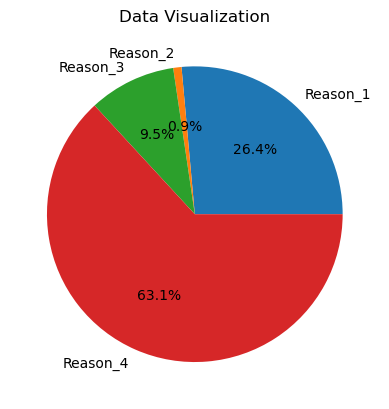

In [9]:
df_reasons = df[['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4']].sum()

plt.pie(df_reasons.values, labels=df_reasons.index, autopct='%1.1f%%')

plt.title('Data Visualization')
plt.show()

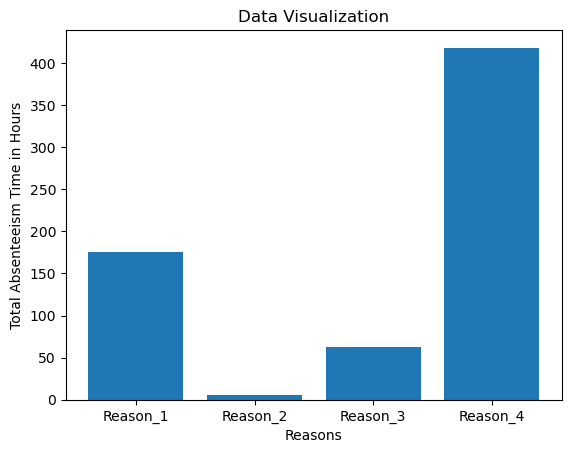

In [8]:
df = df_cleaned
df_reasons = df[['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4']].sum()

plt.bar(df_reasons.index, df_reasons.values)

plt.title('Data Visualization')
plt.xlabel('Reasons')
plt.ylabel('Total Absenteeism Time in Hours')

plt.show()